In [234]:
import pandas as pd
import re
from langdetect import detect

# 컬럼명 없이 텍스트만 있는 CSV 파일 읽기
df = pd.read_csv('.data/kpop_audience_reviews.csv')
print(f"전체 리뷰: {len(df)}개")

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"영어 리뷰: {len(df)}개")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\n첫 10개 샘플:")
print(df_review.head(10))

전체 리뷰: 845개
영어 리뷰: 799개

첫 10개 샘플:
                                          review_text
0                      this the best 2025 movie ever 
1   so fun! artistic, creative, great music and ch...
2             banger music, an actual netflix banger 
3                         was amazing love the songs 
4   recently saw this on netflix with my girlfrien...
5   pretty good film the animation is brilliant as...
6                         amazing, must watch movie. 
7   hate this movie, terrible humor, terribly char...
8             love it !!!!! i love the saja boys !!! 
10  we loved the whole experience! singing along w...


In [235]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

,review_text
0,this the best 2025 movie ever
1,so fun artistic creative great music and chara...
2,banger music an actual netflix banger
3,was amazing love the songs
4,recently saw this on netflix with my girlfrien...
5,pretty good film the animation is brilliant as...
6,amazing must watch movie
7,hate this movie terrible humor terribly charac...
8,love it i love the saja boys
10,we loved the whole experience singing along wi...


In [236]:
print(f"총 리뷰 수: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

총 리뷰 수: 799
empty_reviews : 0


In [237]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(10))

여러 공백이 있는 리뷰: 96개
예시:
8                       love it  i love the saja boys  
21           you like a singalong you might like this  
25                                 8th time seeing it  
47                9  10 i love the song of this movie  
48    let me be clear this definitely was not someth...
54    such an impeccable film  just so so good for a...
65    looking forward for rumi and jinu to get toget...
69    its not my favorite music genre but you can fe...
76    an unexpected gem a review of kpop demon hunte...
91    at first  i thought it was just gonna be an or...
Name: review_text, dtype: object


In [238]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"여러 공백이 있는 리뷰: {multiple_spaces.sum()}개")
if multiple_spaces.sum() > 0:
    print("예시:")
    print(df_review[multiple_spaces]['review_text'].head(3))

여러 공백이 있는 리뷰: 96개
예시:
8                love it  i love the saja boys  
21    you like a singalong you might like this  
25                          8th time seeing it  
Name: review_text, dtype: object


In [239]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"앞 공백: {leading_spaces.sum()}개")
if leading_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[leading_spaces]['review_text'])

앞 공백: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert 
Name: review_text, dtype: object


In [240]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"뒤 공백: {trailing_spaces.sum()}개")
if trailing_spaces.sum() > 0:
    print("\n뒤 공백이 있는 리뷰:")
    print(df_review[trailing_spaces]['review_text'])

뒤 공백: 0개


In [241]:
both_spaces = leading_spaces | trailing_spaces
print(f"앞뒤 공백 총: {both_spaces.sum()}개")
if both_spaces.sum() > 0:
    print("\n앞 공백이 있는 리뷰:")
    print(df_review[both_spaces]['review_text'])

앞뒤 공백 총: 1개

앞 공백이 있는 리뷰:
513     turned my bedroom into a bts concert 
Name: review_text, dtype: object


In [242]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [243]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"제거 후: {both_spaces.sum()}개")

제거 후: 0개


In [244]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"단어 1-2개 리뷰: {(min_words < 3).sum()}개")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [245]:
# import os
# from pathlib import Path
# from datetime import datetime

# # 현재 작업 디렉토리 확인
# print(f"현재 작업 디렉토리: {os.getcwd()}")

# # 저장 경로를 명시적으로 지정
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # 데이터프레임 저장
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM 추가로 Excel 호환성 개선
#     print(f"✅ 전처리 완료 및 저장: {output_path}")
#     print(f"📊 저장된 행 수: {len(df_review)}")
# except Exception as e:
#     print(f"❌ 저장 실패: {e}")
#     # 대안: 홈 디렉토리에 저장
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"✅ 대체 경로에 저장: {home_path}")

In [246]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                               tokens  
0                [this, the, best, 2025, movie, ever]  
1   [so, fun, artistic, creative, great, music, an...  
2        [banger, music, an, actual, netflix, banger]  
3                    [was, amazing, love, the, songs]  
4   [recently, saw, this, on, netflix, with, my, g...  
5   [pretty, good, film, the, animat

In [247]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies', 
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [248]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

0                                     [best, 2025, ever]
1      [fun, artistic, creative, great, music, charac...
2                        [banger, music, actual, banger]
3                                 [amazing, love, songs]
4      [recently, saw, girlfriend, even, though, late...
                             ...                        
840    [kpop, demon, hunters, delivers, one, visually...
841    [kpop, demon, hunters, curates, lot, lore, spe...
842    [music, action, comedy, everything, topnotch, ...
843    [need, original, films, like, cast, music, vis...
844    [outsiders, might, bit, bewildered, particular...
Name: filtered_tokens, Length: 799, dtype: object


In [249]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [250]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [251]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]
)
print(df['lemmatized_tokens'].head(10))

0                                    [best, 2025, ever]
1     [fun, artistic, creative, great, music, charac...
2                       [banger, music, actual, banger]
3                                 [amazing, love, song]
4     [recently, saw, girlfriend, even, though, late...
5     [pretty, good, brilliant, well, story, even, s...
6                                [amazing, must, watch]
7     [hate, terrible, humor, terribly, character, t...
8                               [love, love, saja, boy]
10    [loved, whole, experience, singing, along, the...
Name: lemmatized_tokens, dtype: object


In [252]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [253]:
df['pos_tags'] = df['lemmatized_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS 태깅 결과 (상위 10개):")
print(df[['review_text', 'pos_tags']].head(10))

POS 태깅 결과 (상위 10개):
                                          review_text  \
0                       this the best 2025 movie ever   
1   so fun artistic creative great music and chara...   
2               banger music an actual netflix banger   
3                          was amazing love the songs   
4   recently saw this on netflix with my girlfrien...   
5   pretty good film the animation is brilliant as...   
6                            amazing must watch movie   
7   hate this movie terrible humor terribly charac...   
8                       love it  i love the saja boys   
10  we loved the whole experience singing along wi...   

                                             pos_tags  
0               [(best, JJS), (2025, CD), (ever, RB)]  
1   [(fun, NN), (artistic, JJ), (creative, JJ), (g...  
2   [(banger, NN), (music, NN), (actual, JJ), (ban...  
3            [(amazing, VBG), (love, NN), (song, NN)]  
4   [(recently, RB), (saw, VBD), (girlfriend, VB),...  
5   [(pretty, RB

In [254]:
import pandas as pd
from datetime import datetime

# --- 전처리 데이터 CSV 저장 (간단 버전) ---

df_complete = df[['review_text', 'filtered_tokens', 'pos_tags']].copy()

# 각 컬럼을 문자열로 변환
df_complete['filtered_tokens_str'] = df_complete['filtered_tokens'].apply(lambda x: ' '.join(x))
df_complete['pos_tags_str'] = df_complete['pos_tags'].apply(
    lambda tags: ' '.join([f"{token}/{tag}" for token, tag in tags])
)

# 최종 저장 (리스트 컬럼 제외, 3개 컬럼만)
df_final_complete = df_complete[[
    'review_text', 
    'filtered_tokens_str', 
    'pos_tags_str'
]]

# CSV 파일로 저장
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'preprocessed_parasite_complete_{timestamp}.csv'

df_final_complete.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"✅ 전처리 완료 및 저장: {output_file}")
print(f"📊 저장된 행 수: {len(df_final_complete)}")
print(f"\n📋 저장된 컬럼:")
for i, col in enumerate(df_final_complete.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📄 첫 3개 샘플:")
print(df_final_complete.head(3))

✅ 전처리 완료 및 저장: preprocessed_parasite_complete_20251019_230143.csv
📊 저장된 행 수: 799

📋 저장된 컬럼:
  1. review_text
  2. filtered_tokens_str
  3. pos_tags_str

📄 첫 3개 샘플:
                                         review_text  \
0                      this the best 2025 movie ever   
1  so fun artistic creative great music and chara...   
2              banger music an actual netflix banger   

                            filtered_tokens_str  \
0                                best 2025 ever   
1  fun artistic creative great music characters   
2                    banger music actual banger   

                                        pos_tags_str  
0                           best/JJS 2025/CD ever/RB  
1  fun/NN artistic/JJ creative/JJ great/JJ music/...  
2             banger/NN music/NN actual/JJ banger/NN  


In [255]:
my_tag_set = ['NN','NNS','NNP']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['music', 'song', 'story', 'kpop', 'character', 'time', 'demon', 'watch', 'hunter', 'fun', 'love', 'plot', 'soundtrack', 'year', 'catchy', 'fan', 'kid', 'way', 'something', 'action']


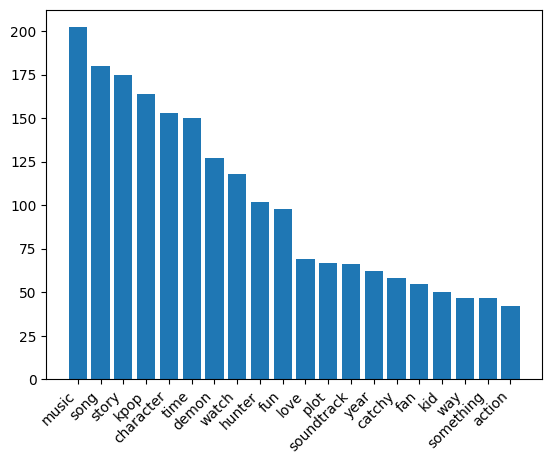

In [256]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

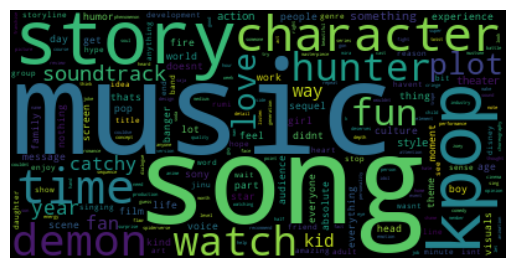

In [257]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [258]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# --- 이 부분은 이미 구현하셨습니다 ---
# 1. 품사 필터링과 표제어 추출까지 모두 마친,
#    최종 토큰 리스트가 담긴 컬럼을 준비합니다.
# 예: df_review['final_tokens'] = result


# --- 바로 이 부분을 수정해야 합니다 ---

# 2. CountVectorizer가 '이미 정제된 토큰'을 입력받는다고 알려줍니다.
vectorizer = CountVectorizer(
    tokenizer=lambda x: x,  # 토큰 리스트를 그대로 사용
    lowercase=False,         # 직접 소문자화 했으므로 비활성화
    max_features=100
    # 참고: stop_words는 이미 이전 단계에서 직접 제거했으므로,
    # 이 단계에서는 생략해도 괜찮습니다.
)

# 3. 원본 텍스트('review_text') 대신,
#    최종 정제된 토큰('final_tokens') 컬럼을 입력합니다.
reviews_cv = vectorizer.fit_transform(df['lemmatized_tokens'])


# --- 결과 확인 ---
print(f"\n벡터 크기: {reviews_cv.shape}")
print(f"특성(단어) 개수: {len(vectorizer.get_feature_names_out())}")
print(f"\n상위 20개 특성:")
print(vectorizer.get_feature_names_out()[:20])


벡터 크기: (799, 100)
특성(단어) 개수: 100

상위 20개 특성:
['absolute' 'absolutely' 'action' 'age' 'along' 'also' 'amazing' 'awesome'
 'beautiful' 'best' 'better' 'boy' 'catchy' 'character' 'could' 'culture'
 'definitely' 'demon' 'didnt' 'doesnt']


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x,
    lowercase=False,
    max_features=100
)

reviews_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_tokens'])

print(f"\n벡터 크기: {reviews_tfidf.shape}")
print(f"특성(단어) 개수: {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"\n상위 20개 특성 (TF-IDF 기준):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


벡터 크기: (799, 100)
특성(단어) 개수: 100

상위 20개 특성 (TF-IDF 기준):
['absolute' 'absolutely' 'action' 'age' 'along' 'also' 'amazing' 'awesome'
 'beautiful' 'best' 'better' 'boy' 'catchy' 'character' 'could' 'culture'
 'definitely' 'demon' 'didnt' 'doesnt']


영어 리뷰: 801개


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---

[CountVectorizer 상위 단어 리스트]
['music', 'song', 'story', 'kpop', 'character', 'time', 'demon', 'watch', 'hunter', 'fun', 'love', 'plot', 'soundtrack', 'year', 'catchy', 'fan', 'kid', 'way', 'something', 'action']

[TfidfVectorizer 상위 단어 리스트]
['song', 'music', 'time', 'story', 'kpop', 'character', 'watch', 'fun', 'demon', 'love', 'hunter', 'year', 'plot', 'soundtrack', 'catchy', 'kid', 'fan', 'theater', 'way', 'something']


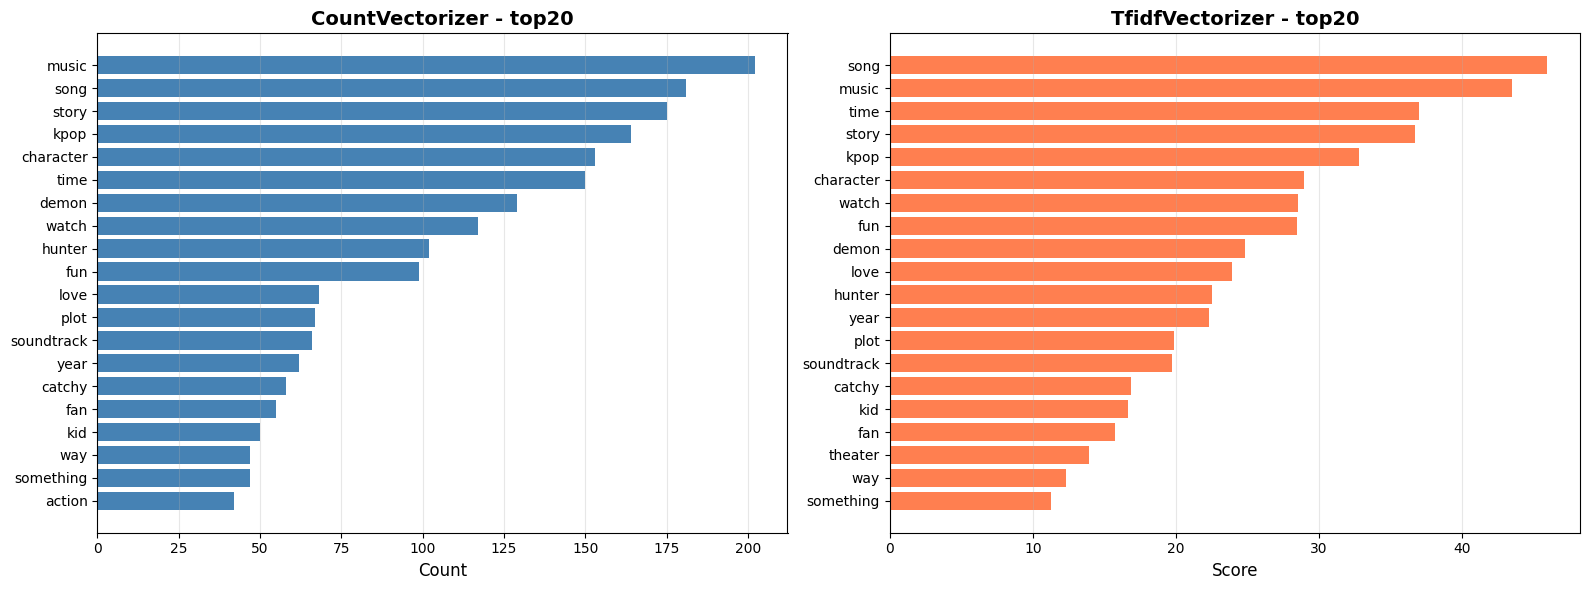

In [260]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV 파일 읽기
df = pd.read_csv('.data/kpop_audience_reviews.csv')

# 언어 감지 함수
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# 영어 리뷰만 필터링
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"영어 리뷰: {len(df_review)}개")

# Stopwords 설정
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'animation', 'movies', 
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)

# 전처리 함수
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP'}

def preprocess_text(text):
    # 1. 소문자 변환 및 특수문자 제거 (영문자, 숫자, 공백만 유지)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())
    
    # 2. 토큰화
    tokens = word_tokenize(text)
    
    # 3. Stopwords 제거 및 길이 필터링
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    
    # 4. Lemmatization (표제어 추출)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # 5. POS Tagging & 필터링
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]
    
    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer 실행
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer 실행
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()


# --- 각 행렬의 단어별 총합을 계산하여 중요도 순으로 정렬하는 함수 ---
def get_top_n_features(feature_names, matrix, n=20):
    # 각 단어(feature)의 점수를 모두 더합니다.
    sum_features = matrix.sum(axis=0)

    # 단어 이름과 점수를 짝지어 DataFrame으로 만듭니다.
    features_df = pd.DataFrame(sum_features, columns=feature_names).T
    features_df.columns = ['score']

    # 점수가 높은 순으로 정렬하여 상위 n개를 반환합니다.
    return features_df.sort_values(by='score', ascending=False).head(n)

# --- 5. 결과 출력 (단어 리스트만) ---
print("\n--- 최종 정제된 토큰 상위 키워드 비교 (단어만 출력) ---")

# CountVectorizer 결과 (단순 빈도 합계 기준)
cv_top_keywords = get_top_n_features(cv_top_features, cv_matrix)
print("\n[CountVectorizer 상위 단어 리스트]")
print(cv_top_keywords.index.tolist()) # .index.tolist() 추가!


# TfidfVectorizer 결과 (TF-IDF 점수 합계 기준)
tfidf_top_keywords = get_top_n_features(tfidf_top_features, tfidf_matrix)
print("\n[TfidfVectorizer 상위 단어 리스트]")
print(tfidf_top_keywords.index.tolist()) # .index.tolist() 추가!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CountVectorizer 막대 그래프
cv_words = cv_top_keywords.index.tolist()
cv_scores = cv_top_keywords['score'].tolist()

ax1.barh(cv_words[::-1], cv_scores[::-1], color='steelblue')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('CountVectorizer - top20', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# TfidfVectorizer 막대 그래프
tfidf_words = tfidf_top_keywords.index.tolist()
tfidf_scores = tfidf_top_keywords['score'].tolist()

ax2.barh(tfidf_words[::-1], tfidf_scores[::-1], color='coral')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_title('TfidfVectorizer - top20', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [261]:
# CountVectorizer가 계산한 첫 번째 리뷰의 벡터 값
print("\n[CountVectorizer의 첫 리뷰 벡터 값 (상위 20개)]")
print(cv_matrix[0].toarray()[:, :20])

# TfidfVectorizer가 계산한 첫 번째 리뷰의 벡터 값
print("\n[TfidfVectorizer의 첫 리뷰 벡터 값 (상위 20개)]")
print(tfidf_matrix[0].toarray()[:, :20])


[CountVectorizer의 첫 리뷰 벡터 값 (상위 20개)]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

[TfidfVectorizer의 첫 리뷰 벡터 값 (상위 20개)]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [262]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA 모델 생성
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # 결과 재현성을 위한 설정
    update_every=1,
    chunksize=100,
    passes=10, # 전체 코퍼스를 몇 번 반복 학습할지 결정
    alpha='auto',
    per_word_topics=True
)

print("LDA 모델 학습이 완료되었습니다.")


# --- 4. 결과 확인 및 시각화 ---

# 4-1. 텍스트로 토픽 확인
print("\n--- 각 토픽별 주요 단어 ---")
topics = lda_model.print_topics(num_words=10) # 각 토픽별로 10개 단어 출력
for topic in topics:
    print(topic)

# 4-2. pyLDAvis를 사용한 인터랙티브 시각화
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA 모델 학습이 완료되었습니다.

--- 각 토픽별 주요 단어 ---
(0, '0.063*"song" + 0.044*"time" + 0.033*"love" + 0.027*"music" + 0.026*"plot" + 0.022*"watch" + 0.020*"sony" + 0.015*"catchy" + 0.015*"didnt" + 0.015*"banger"')
(1, '0.083*"kpop" + 0.059*"demon" + 0.051*"hunter" + 0.025*"fan" + 0.020*"story" + 0.019*"song" + 0.016*"year" + 0.014*"music" + 0.014*"film" + 0.013*"world"')
(2, '0.073*"character" + 0.048*"music" + 0.038*"fun" + 0.021*"watch" + 0.020*"way" + 0.019*"soundtrack" + 0.017*"style" + 0.017*"story" + 0.014*"moment" + 0.013*"age"')
(3, '0.033*"kid" + 0.015*"head" + 0.014*"time" + 0.014*"day" + 0.014*"get" + 0.014*"soundtrack" + 0.013*"detail" + 0.012*"attention" + 0.009*"picture" + 0.009*"year"')
(4, '0.097*"story" + 0.082*"visuals" + 0.079*"star" + 0.076*"remains" + 0.076*"struggle" + 0.075*"sheen" + 0.075*"outsider" + 0.075*"endeavor" + 0.075*"sensitivity" + 0.011*"something"')


c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.119071  0.240575       1        1  26.496215
1     -0.113146 -0.225345       2        1  26.378167
0     -0.223855  0.019435       3        1  20.192754
4      0.323098 -0.187407       4        1  14.105945
3      0.132975  0.152741       5        1  12.826919, topic_info=           Term        Freq       Total Category  logprob  loglift
39         kpop  150.000000  150.000000  Default  30.0000  30.0000
0     character  133.000000  133.000000  Default  29.0000  29.0000
15        story  159.000000  159.000000  Default  28.0000  28.0000
239     visuals   79.000000   79.000000  Default  27.0000  27.0000
98         star   77.000000   77.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
60   soundtrack   11.825259   57.445865   Topic5  -4.3038   0.4730
44       sequel    6.961621   21.747816   Topic5  -4.8336   0.9145
9          time   12.567520  102.403012   Topic5  -4.2429  -0.0442
133        year    7.841944   46.450856   Topic5  -4.7145   0.2747
6          hype    4.782033    9.902710   Topic5  -5.2091   1.3257

[228 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
138       3  0.960004  absolute
626       3  0.177328       act
626       5  0.709310       act
22        1  0.495723    action
22        2  0.468182    action
...     ...       ...       ...
115       2  0.961388     world
642       1  0.944341   wouldnt
133       2  0.624316      year
133       3  0.215281      year
133       5  0.172225      year

[217 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])